In [400]:
#Starter code provided by TA
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [401]:
#Starter code provided by TA
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

650

In [402]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Creating lists of city data
city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date_processed = []

# Print to logger
print('Beginning Data Retrieval')      
print('-----------------------------')

# Create counters
record_count = 0

# Loop through all the cities in our list
for city in cities:
    # Create endpoint URL with each city
    query_url = url + '&q=' + city
    # time.sleep(3)    Use this to only pull 1 API call every 3 seconds
    
    # Run an API request for each of the cities
    try:
        # Using json to retreive data
        weather_data = requests.get(query_url).json()

        # Gathering data about each city
        city_name.append(weather_data["name"])
        lat.append(weather_data["coord"]["lat"])
        long.append(weather_data["coord"]["lon"])      
        max_temp.append(weather_data["main"]["temp_max"])
        humidity.append(weather_data["main"]["humidity"])
        cloudiness.append(weather_data["clouds"]["all"])
        wind_speed.append(weather_data["wind"]["speed"])
        country.append(weather_data["sys"]["country"])
        date_processed.append(weather_data["dt"])
        record_count += 1
        print(f'Processing Record {record_count} | {city}')
     # If an error is experienced, skip the city
    except(KeyError, IndexError):
         print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | victor harbor
Processing Record 2 | pisco
Processing Record 3 | port keats
Processing Record 4 | qinhuangdao
Processing Record 5 | margate
Processing Record 6 | grong
Processing Record 7 | nouadhibou
Processing Record 8 | chuy
Processing Record 9 | chokurdakh
Processing Record 10 | shirokiy
Processing Record 11 | cayenne
City not found. Skipping...
Processing Record 12 | kalangala
Processing Record 13 | oriximina
Processing Record 14 | longyearbyen
Processing Record 15 | embonas
Processing Record 16 | tasiilaq
City not found. Skipping...
Processing Record 17 | bathsheba
Processing Record 18 | pangnirtung
Processing Record 19 | sola
Processing Record 20 | faya
Processing Record 21 | niwari
City not found. Skipping...
City not found. Skipping...
Processing Record 22 | assiniboia
Processing Record 23 | surt
Processing Record 24 | morondava
Processing Record 25 | busselton
Processing Record 26 | tiksi
Processing R

Processing Record 234 | ocean city
Processing Record 235 | yulara
Processing Record 236 | kaitangata
Processing Record 237 | kamenka
Processing Record 238 | venkatagiri
Processing Record 239 | cherskiy
Processing Record 240 | hasaki
Processing Record 241 | thompson
Processing Record 242 | okhotsk
Processing Record 243 | san cristobal
Processing Record 244 | brae
Processing Record 245 | trairi
Processing Record 246 | norman wells
Processing Record 247 | basco
Processing Record 248 | lasa
Processing Record 249 | laureles
Processing Record 250 | bara
Processing Record 251 | santo antonio do ica
Processing Record 252 | morar
Processing Record 253 | sarankhola
Processing Record 254 | kaeo
Processing Record 255 | sao goncalo do sapucai
Processing Record 256 | lazne belohrad
Processing Record 257 | juegang
Processing Record 258 | warrington
City not found. Skipping...
Processing Record 259 | molina
Processing Record 260 | carnarvon
Processing Record 261 | yarkovo
Processing Record 262 | bered

City not found. Skipping...
Processing Record 466 | huarmey
Processing Record 467 | laguna
Processing Record 468 | wanaka
Processing Record 469 | guerrero negro
Processing Record 470 | yar-sale
Processing Record 471 | maine-soroa
Processing Record 472 | pemangkat
Processing Record 473 | sakakah
Processing Record 474 | itarema
City not found. Skipping...
Processing Record 475 | bell ville
City not found. Skipping...
Processing Record 476 | maun
Processing Record 477 | fontenay-le-comte
Processing Record 478 | banjar
Processing Record 479 | komsomolskiy
Processing Record 480 | nalut
Processing Record 481 | boshnyakovo
Processing Record 482 | kieta
Processing Record 483 | ginda
Processing Record 484 | joensuu
Processing Record 485 | moindou
Processing Record 486 | muscat
Processing Record 487 | iraray
Processing Record 488 | denia
Processing Record 489 | singkang
Processing Record 490 | mersing
Processing Record 491 | elizabeth city
Processing Record 492 | usinsk
Processing Record 493 | v

In [403]:
#Converting timestamp into date
from datetime import datetime
dates = []
dates = [datetime.fromtimestamp(item).date().strftime('%m/%d/%y') for item in date_processed]

In [404]:
#Putting the data into a dictionary, creating a df, & getting count of all records
weather_dict = {
    'City':city_name,
    'Lat':lat,
    'Lng':long,
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':dates
}

weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [405]:
weather_dataframe

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victor Harbor,-35.57,138.62,55.99,74,96,4.00,AU,10/23/20
1,Pisco,-13.70,-76.22,71.60,60,0,16.11,PE,10/23/20
2,Port Keats,-14.25,129.55,81.34,79,11,8.61,AU,10/23/20
3,Qinhuangdao,39.93,119.59,45.30,53,0,5.19,CN,10/23/20
4,Margate,51.38,1.39,54.00,83,46,1.99,GB,10/23/20
...,...,...,...,...,...,...,...,...,...
596,Ankang,32.68,109.02,55.58,65,100,3.33,CN,10/23/20
597,Okha,53.57,142.95,45.72,92,100,33.22,RU,10/23/20
598,Padang,-0.95,100.35,79.83,77,100,3.09,ID,10/23/20
599,Mount Gambier,-37.83,140.77,50.00,87,90,10.29,AU,10/23/20


In [406]:
#Checking to see if any cities have humidity over 100, there are none
weather_dataframe.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.00000
mean,19.742962,20.798286,61.453827,72.118136,50.547421,7.93980
std,33.040898,89.367684,21.829723,21.290319,41.013715,6.12696
min,-54.800000,-179.170000,5.490000,11.000000,0.000000,0.13000
25%,-8.190000,-58.800000,45.720000,62.000000,1.000000,3.80000
50%,22.570000,25.190000,68.000000,77.000000,55.000000,6.51000
75%,48.000000,103.840000,77.830000,88.000000,93.000000,10.29000
max,78.220000,179.320000,100.920000,100.000000,100.000000,47.20000


In [407]:
weather_dataframe.to_csv("output_data/city_data.csv", encoding="utf-8", index=False)

In [408]:
weather_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victor Harbor,-35.57,138.62,55.99,74,96,4.00,AU,10/23/20
1,Pisco,-13.70,-76.22,71.60,60,0,16.11,PE,10/23/20
2,Port Keats,-14.25,129.55,81.34,79,11,8.61,AU,10/23/20
3,Qinhuangdao,39.93,119.59,45.30,53,0,5.19,CN,10/23/20
4,Margate,51.38,1.39,54.00,83,46,1.99,GB,10/23/20


In [409]:
#Getting date generated
Date_Generated = weather_dataframe['Date'].iloc[0]

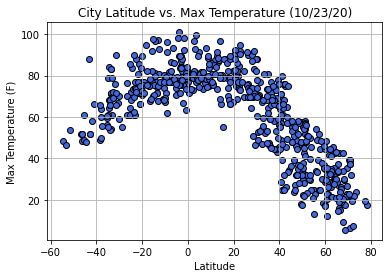

In [410]:
#Creating a scatter plot for Latitude vs. Max Temperature & Saving Figure
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Max Temp'], facecolors="royalblue", edgecolors="black")

plt.title(f'City Latitude vs. Max Temperature ({Date_Generated})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

plt.savefig("output_data/fig1.png")

plt.show()

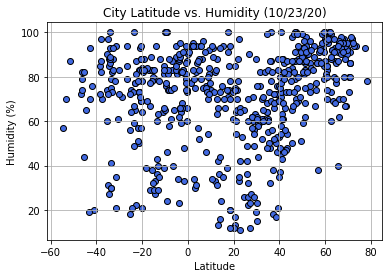

In [411]:
#Creating a scatter plot for Latitude vs. Humidity & Saving Figure
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Humidity'], facecolors="royalblue", edgecolors="black")

plt.title(f'City Latitude vs. Humidity ({Date_Generated})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.savefig("output_data/fig2.png")

plt.show()

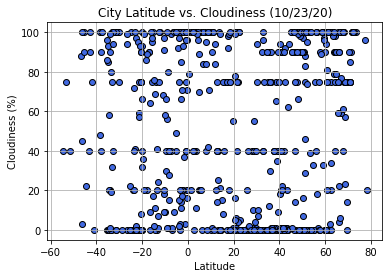

In [412]:
#Creating a scatter plot for Latitude vs. Cloudiness & Saving Figure
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Cloudiness'], facecolors="royalblue", edgecolors="black")

plt.title(f'City Latitude vs. Cloudiness ({Date_Generated})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

plt.savefig("output_data/fig3.png")

plt.show()

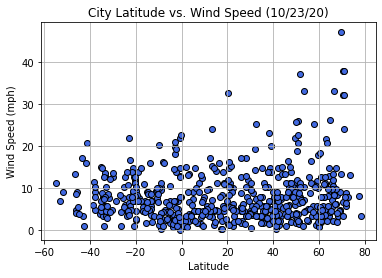

In [413]:
#Creating a scatter plot for Latitude vs. Wind Speed & Saving Figure
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Wind Speed'], facecolors="royalblue", edgecolors="black")

plt.title(f'City Latitude vs. Wind Speed ({Date_Generated})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

plt.savefig("output_data/fig4.png")

plt.show()

In [414]:
# Add the linear regression equation and line to plot
def linearplot (x_values, y_values):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    line_eq = 'y = ' + str(round(slope, 2)) + 'x +' + str(round(intercept,2))

    return[plt.scatter(x_values, y_values, facecolors="royalblue"),
           plt.annotate(line_eq, xy = linexy, fontsize=15, color='red'),
           plt.plot(x_values,regress_values,"r-"),
           print(f"The r-squared is: {rvalue**2}"),
           plt.xlabel('Latitude')]

In [415]:
#Creating Northern and Southern df
Northern_df = weather_dataframe.loc[weather_dataframe['Lat'] >= 0]
Southern_df = weather_dataframe.loc[weather_dataframe['Lat'] <= 0]

The r-squared is: 0.7426500093188766


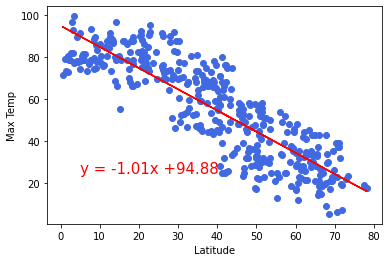

In [416]:
# Max Temp vs Latitude, Linear regression on Northern Hemisphere
x = Northern_df['Lat'];
y = Northern_df['Max Temp'];
linexy = (5,25)

linearplot('x_values', 'y_values');
plt.ylabel('Max Temp');

The r-squared is: 0.4185956865095246


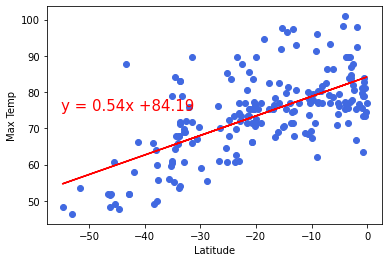

In [426]:
# Max Temp vs Latitude, Linear regression on Southern Hemisphere
x = Southern_df['Lat'];
y = Southern_df['Max Temp'];
linexy = (-55,75)

linearplot('x_values', 'y_values');

plt.ylabel('Max Temp');

The r-squared is: 0.15215903691265334


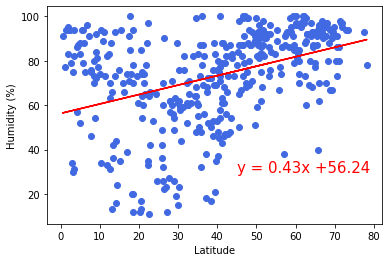

In [427]:
# Humidity % vs Latitude, Linear regression on Northern Hemisphere
x = Northern_df['Lat'];
y = Northern_df['Humidity'];
linexy = (45,30)

linearplot('x_values', 'y_values');

plt.ylabel('Humidity (%)');

The r-squared is: 0.0012426737004433627


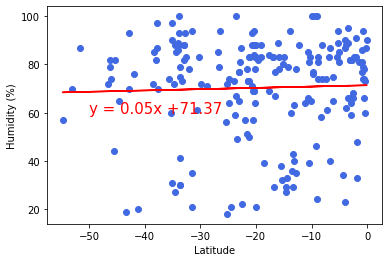

In [428]:
# Humidity % vs Latitude, Linear regression on Southern Hemisphere
x = Southern_df['Lat'];
y = Southern_df['Humidity'];
linexy = (-50,60)

linearplot('x_values', 'y_values');

plt.ylabel('Humidity (%)');

The r-squared is: 0.02495442020507737


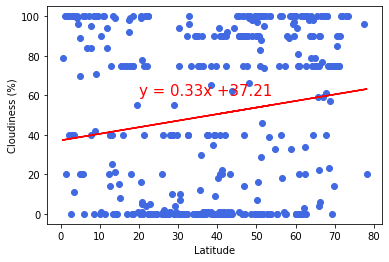

In [429]:
# Cloudiness % vs Latitude, Linear regression on Northern Hemisphere
x = Northern_df['Lat'];
y = Northern_df['Cloudiness'];
linexy = (20,60)

linearplot('x_values', 'y_values');

plt.ylabel('Cloudiness (%)');

The r-squared is: 6.933211097814038e-05


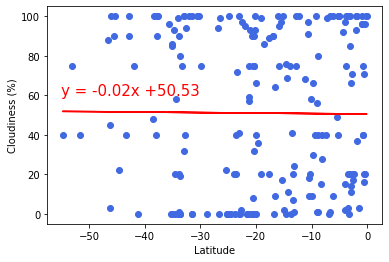

In [430]:
# Cloudiness % vs Latitude, Linear regression on Southern Hemisphere
x = Southern_df['Lat'];
y = Southern_df['Cloudiness'];
linexy = (-55,60)

linearplot('x_values', 'y_values');

plt.ylabel('Cloudiness (%)');

The r-squared is: 0.03817023487237789


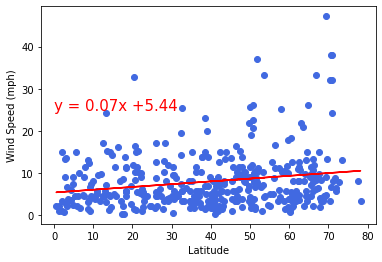

In [431]:
# Wind Speed (mph) vs Latitude, Linear regression on Northern Hemisphere
x = Northern_df['Lat'];
y = Northern_df['Wind Speed'];
linexy = (0,25)

linearplot('x_values', 'y_values');

plt.ylabel('Wind Speed (mph)');

The r-squared is: 0.006289085794475822


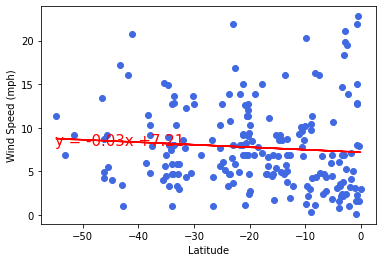

In [432]:
# Wind Speed (mph) vs Latitude, Linear regression on Southern Hemisphere
x = Southern_df['Lat'];
y = Southern_df['Wind Speed'];
linexy = (-55,8)

linearplot('x_values', 'y_values');

plt.ylabel('Wind Speed (mph)');